In [91]:
!pip install pyspark

In [92]:
!wget https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv -O features.csv
!wget https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv -O labels.csv

--2022-03-01 01:11:28--  https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.26.38
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.26.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20069199 (19M) [text/csv]
Saving to: ‘features.csv’

features.csv        100%[===================>]  19.14M  22.4MB/s    in 0.9s    

2022-03-01 01:11:29 (22.4 MB/s) - ‘features.csv’ saved [20069199/20069199]

--2022-03-01 01:11:29--  https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.26.38
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.26.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148327 (1.1M) [text/csv]
Saving to: ‘labels.csv’

labels.csv          100%[===================>]   1.09M  2.99MB/s    in 0.4s    

2022-03-01 01:11:30 (2.99 MB

In [93]:
!ls

features.csv  labels.csv  sample_data


In [94]:
from pyspark.sql import SparkSession
sc = SparkSession.builder.getOrCreate()

In [95]:
df_features = sc.read.csv('/content/features.csv',header=True,inferSchema=True)
df_labels = sc.read.csv('/content/labels.csv',header=True,inferSchema=True)

In [96]:
df_features.count()

59400

In [97]:
df_labels.count()

59400

In [98]:
df_features.printSchema()

root
 |-- id: integer (nullable = true)
 |-- amount_tsh: double (nullable = true)
 |-- date_recorded: string (nullable = true)
 |-- funder: string (nullable = true)
 |-- gps_height: integer (nullable = true)
 |-- installer: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- wpt_name: string (nullable = true)
 |-- num_private: integer (nullable = true)
 |-- basin: string (nullable = true)
 |-- subvillage: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_code: integer (nullable = true)
 |-- district_code: integer (nullable = true)
 |-- lga: string (nullable = true)
 |-- ward: string (nullable = true)
 |-- population: integer (nullable = true)
 |-- public_meeting: boolean (nullable = true)
 |-- recorded_by: string (nullable = true)
 |-- scheme_management: string (nullable = true)
 |-- scheme_name: string (nullable = true)
 |-- permit: boolean (nullable = true)
 |-- construction_year: integer (nullable = 

In [99]:
df_labels.printSchema()

root
 |-- id: integer (nullable = true)
 |-- status_group: string (nullable = true)



In [100]:
df_features.show()

+-----+----------+-------------+--------------------+----------+--------------------+-----------+-------------------+--------------------+-----------+--------------------+---------------+-----------+-----------+-------------+----------------+--------------+----------+--------------+--------------------+-----------------+--------------------+------+-----------------+---------------+---------------------+---------------------+----------------+----------------+--------------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+--------------------+---------------------+
|   id|amount_tsh|date_recorded|              funder|gps_height|           installer|  longitude|           latitude|            wpt_name|num_private|               basin|     subvillage|     region|region_code|district_code|             lga|          ward|population|public_meeting|         recorded_by|scheme_management|         scheme_name|permit

In [101]:
df_labels.show()

+-----+--------------------+
|   id|        status_group|
+-----+--------------------+
|69572|          functional|
| 8776|          functional|
|34310|          functional|
|67743|      non functional|
|19728|          functional|
| 9944|          functional|
|19816|      non functional|
|54551|      non functional|
|53934|      non functional|
|46144|          functional|
|49056|          functional|
|50409|          functional|
|36957|          functional|
|50495|          functional|
|53752|          functional|
|61848|          functional|
|48451|      non functional|
|58155|      non functional|
|34169|functional needs ...|
|18274|          functional|
+-----+--------------------+
only showing top 20 rows



In [102]:
data = df_features.join(df_labels,on='id')
data.columns

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

Task 2 - Change column type, drop duplicated rows, remove whitespacs. If you are disconnected, please run the previous cells by clicking on this cell, going to Runtime, then clicking Run before.

In [103]:
data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- amount_tsh: double (nullable = true)
 |-- date_recorded: string (nullable = true)
 |-- funder: string (nullable = true)
 |-- gps_height: integer (nullable = true)
 |-- installer: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- wpt_name: string (nullable = true)
 |-- num_private: integer (nullable = true)
 |-- basin: string (nullable = true)
 |-- subvillage: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_code: integer (nullable = true)
 |-- district_code: integer (nullable = true)
 |-- lga: string (nullable = true)
 |-- ward: string (nullable = true)
 |-- population: integer (nullable = true)
 |-- public_meeting: boolean (nullable = true)
 |-- recorded_by: string (nullable = true)
 |-- scheme_management: string (nullable = true)
 |-- scheme_name: string (nullable = true)
 |-- permit: boolean (nullable = true)
 |-- construction_year: integer (nullable = 

In [104]:
from pyspark.sql.functions import col
data = data.withColumn('region',col('region').cast('string'))\
           .withColumn('district_code',col('district_code').cast('string'))

In [105]:
data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- amount_tsh: double (nullable = true)
 |-- date_recorded: string (nullable = true)
 |-- funder: string (nullable = true)
 |-- gps_height: integer (nullable = true)
 |-- installer: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- wpt_name: string (nullable = true)
 |-- num_private: integer (nullable = true)
 |-- basin: string (nullable = true)
 |-- subvillage: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_code: integer (nullable = true)
 |-- district_code: string (nullable = true)
 |-- lga: string (nullable = true)
 |-- ward: string (nullable = true)
 |-- population: integer (nullable = true)
 |-- public_meeting: boolean (nullable = true)
 |-- recorded_by: string (nullable = true)
 |-- scheme_management: string (nullable = true)
 |-- scheme_name: string (nullable = true)
 |-- permit: boolean (nullable = true)
 |-- construction_year: integer (nullable = t

In [106]:
data = data.drop_duplicates()
data.count()

59400

In [107]:
from pyspark.sql.functions import isnan, when, count, col

Dict_Null  = {col:data.filter(data[col].isNull()).count() for col in data.columns}
Dict_Null 

{'amount_tsh': 0,
 'basin': 0,
 'construction_year': 0,
 'date_recorded': 0,
 'district_code': 0,
 'extraction_type': 0,
 'extraction_type_class': 0,
 'extraction_type_group': 0,
 'funder': 3635,
 'gps_height': 0,
 'id': 0,
 'installer': 3655,
 'latitude': 0,
 'lga': 0,
 'longitude': 0,
 'management': 0,
 'management_group': 0,
 'num_private': 0,
 'payment': 0,
 'payment_type': 0,
 'permit': 3056,
 'population': 0,
 'public_meeting': 3334,
 'quality_group': 0,
 'quantity': 0,
 'quantity_group': 0,
 'recorded_by': 0,
 'region': 0,
 'region_code': 0,
 'scheme_management': 3877,
 'scheme_name': 28166,
 'source': 0,
 'source_class': 0,
 'source_type': 0,
 'status_group': 0,
 'subvillage': 371,
 'ward': 0,
 'water_quality': 0,
 'waterpoint_type': 0,
 'waterpoint_type_group': 0,
 'wpt_name': 0}

In [108]:
type(Dict_Null)

dict

In [109]:
ls = []
for key,value in Dict_Null.items():
  if value >0:
    ls.append(key)

In [110]:
ls

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

Task 3 - Remove columns with null values more than a threshold. If you are disconnected, please run the previous cells by clicking on this cell, going to Runtime, then clicking Run before.

In [111]:
for i in ls:
  data.drop_duplicates([i])
{col:data.filter(data[col].isNull()).count() for col in data.columns}

{'amount_tsh': 0,
 'basin': 0,
 'construction_year': 0,
 'date_recorded': 0,
 'district_code': 0,
 'extraction_type': 0,
 'extraction_type_class': 0,
 'extraction_type_group': 0,
 'funder': 3635,
 'gps_height': 0,
 'id': 0,
 'installer': 3655,
 'latitude': 0,
 'lga': 0,
 'longitude': 0,
 'management': 0,
 'management_group': 0,
 'num_private': 0,
 'payment': 0,
 'payment_type': 0,
 'permit': 3056,
 'population': 0,
 'public_meeting': 3334,
 'quality_group': 0,
 'quantity': 0,
 'quantity_group': 0,
 'recorded_by': 0,
 'region': 0,
 'region_code': 0,
 'scheme_management': 3877,
 'scheme_name': 28166,
 'source': 0,
 'source_class': 0,
 'source_type': 0,
 'status_group': 0,
 'subvillage': 371,
 'ward': 0,
 'water_quality': 0,
 'waterpoint_type': 0,
 'waterpoint_type_group': 0,
 'wpt_name': 0}

Task 4 - Group, aggregate, create pivot table. If you are disconnected, please run the previous cells by clicking on this cell, going to Runtime, then clicking Run before.

In [112]:
type(data)

pyspark.sql.dataframe.DataFrame

In [113]:
data.groupby('recorded_by').count().show()

+--------------------+-----+
|         recorded_by|count|
+--------------------+-----+
|GeoData Consultan...|59400|
+--------------------+-----+



In [114]:
data.groupby('water_quality').count().orderBy('count',ascending=False).show()

+------------------+-----+
|     water_quality|count|
+------------------+-----+
|              soft|50818|
|             salty| 4856|
|           unknown| 1876|
|             milky|  804|
|          coloured|  490|
|   salty abandoned|  339|
|          fluoride|  200|
|fluoride abandoned|   17|
+------------------+-----+



In [115]:
data = data.drop('recorded_by')

In [116]:
data.groupBy('status_group').pivot('region').sum('amount_tsh').show()

+--------------------+---------+-------------+------+---------+------+--------+-----------+-------+--------+--------+-----+--------+-------+-------+---------+--------+---------+---------+--------+------+--------+
|        status_group|   Arusha|Dar es Salaam|Dodoma|   Iringa|Kagera|  Kigoma|Kilimanjaro|  Lindi| Manyara|    Mara|Mbeya|Morogoro| Mtwara| Mwanza|    Pwani|   Rukwa|   Ruvuma|Shinyanga| Singida|Tabora|   Tanga|
+--------------------+---------+-------------+------+---------+------+--------+-----------+-------+--------+--------+-----+--------+-------+-------+---------+--------+---------+---------+--------+------+--------+
|functional needs ...|  10280.0|          0.0|   0.0| 118400.0|   0.0|270770.0|   129248.0| 3625.0| 71315.0|   900.0|  0.0| 70005.0|36240.0|10000.0|    520.0|292980.0| 125650.0|   2200.0|  6505.0|   0.0|  4310.0|
|          functional|1125485.0|     181175.0|   0.0|5515710.0|   0.0|530725.0|  746942.25|24560.0|312745.0| 96786.0|  0.0|587642.0|52710.0|33550.0|

In [117]:
data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- amount_tsh: double (nullable = true)
 |-- date_recorded: string (nullable = true)
 |-- funder: string (nullable = true)
 |-- gps_height: integer (nullable = true)
 |-- installer: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- wpt_name: string (nullable = true)
 |-- num_private: integer (nullable = true)
 |-- basin: string (nullable = true)
 |-- subvillage: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_code: integer (nullable = true)
 |-- district_code: string (nullable = true)
 |-- lga: string (nullable = true)
 |-- ward: string (nullable = true)
 |-- population: integer (nullable = true)
 |-- public_meeting: boolean (nullable = true)
 |-- scheme_management: string (nullable = true)
 |-- scheme_name: string (nullable = true)
 |-- permit: boolean (nullable = true)
 |-- construction_year: integer (nullable = true)
 |-- extraction_type: string (nullable

Task 5 - Convert categories with low frequency to Others, impute missing values. If you are disconnected, please run the previous cells by clicking on this cell, going to Runtime, then clicking Run before.

In [118]:
data.columns

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

In [119]:
value_cat = data.groupBy(data.columns[0]).count().collect()

In [120]:
value_cat[0][1]

1

In [121]:
import pyspark.sql.utils
for column in data.columns:
  try:
    value_cat = data.groupBy(column).count().collect()
    lessthan = [x[0] for x in value_cat if x[1]< 1000]
    datanews = data.withColumn(column,when(col(column).isin(lessthan),'Others').otherwise(col(column)))
    datanews.groupBy(column).count().orderBy('count',ascending=False).show()
  except pyspark.sql.utils.AnalysisException:
    print("Unable to process your query dude!!")


+------+-----+
|    id|count|
+------+-----+
|Others|59400|
+------+-----+

+----------+-----+
|amount_tsh|count|
+----------+-----+
|       0.0|41639|
|    Others| 8016|
|     500.0| 3102|
|      50.0| 2472|
|    1000.0| 1488|
|      20.0| 1463|
|     200.0| 1220|
+----------+-----+

+-------------+-----+
|date_recorded|count|
+-------------+-----+
|       Others|59400|
+-------------+-----+

+--------------------+-----+
|              funder|count|
+--------------------+-----+
|              Others|35052|
|Government Of Tan...| 9084|
|                null| 3635|
|              Danida| 3114|
|              Hesawa| 2202|
|               Rwssp| 1374|
|          World Bank| 1349|
|                Kkkt| 1287|
|        World Vision| 1246|
|              Unicef| 1057|
+--------------------+-----+

+----------+-----+
|gps_height|count|
+----------+-----+
|    Others|38962|
|         0|20438|
+----------+-----+

+----------+-----+
| installer|count|
+----------+-----+
|    Others|33202|
|    

In [122]:
data.groupBy('population').count().orderBy('population').show()

+----------+-----+
|population|count|
+----------+-----+
|         0|21381|
|         1| 7025|
|         2|    4|
|         3|    4|
|         4|   13|
|         5|   44|
|         6|   19|
|         7|    3|
|         8|   23|
|         9|   11|
|        10|  163|
|        11|    7|
|        12|   43|
|        13|   12|
|        14|   18|
|        15|  193|
|        16|    8|
|        17|    6|
|        18|   18|
|        19|    3|
+----------+-----+
only showing top 20 rows



In [123]:
from pyspark.sql.functions import lit
data = data.withColumn('population',when(col('population')<2,lit(None)).otherwise(col('population')))

In [124]:
data.show()

+-----+----------+-------------+--------------------+----------+-------------------+-----------+-------------------+-----------------+-----------+--------------------+------------+-----------+-----------+-------------+----------------+---------+----------+--------------+-----------------+--------------------+------+-----------------+---------------+---------------------+---------------------+----------+----------------+--------------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+--------------------+---------------------+--------------------+
|   id|amount_tsh|date_recorded|              funder|gps_height|          installer|  longitude|           latitude|         wpt_name|num_private|               basin|  subvillage|     region|region_code|district_code|             lga|     ward|population|public_meeting|scheme_management|         scheme_name|permit|construction_year|extraction_type|extraction_type_

In [125]:
from pyspark.sql.window import Window
w = Window.partitionBy(data['district_code'])

In [126]:
from pyspark.sql.functions import avg,ceil
data = data.withColumn('population',when(col('population').isNull(),avg(data['population']).over(w)).otherwise(col('population')))

In [127]:
data = data.withColumn('population',ceil(data['population']))
data.groupBy('population').count().orderBy('population').show()

+----------+-----+
|population|count|
+----------+-----+
|      null|   35|
|         2|    4|
|         3|    4|
|         4|   13|
|         5|   44|
|         6|   19|
|         7|    3|
|         8|   23|
|         9|   11|
|        10|  163|
|        11|    7|
|        12|   43|
|        13|   12|
|        14|   18|
|        15|  193|
|        16|    8|
|        17|    6|
|        18|   18|
|        19|    3|
|        20|  462|
+----------+-----+
only showing top 20 rows



Task 6 - Make visualizations. If you are disconnected, please run the previous cells by clicking on this cell, going to Runtime, then clicking Run before.

In [128]:
color_status = {'functional': 'green', 'non functional': 'red', 'functional needs repair': 'blue'}

In [129]:
cols =['status_group','payment_type','longitude','latitude','gps_height']
df = data.select(cols).toPandas()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

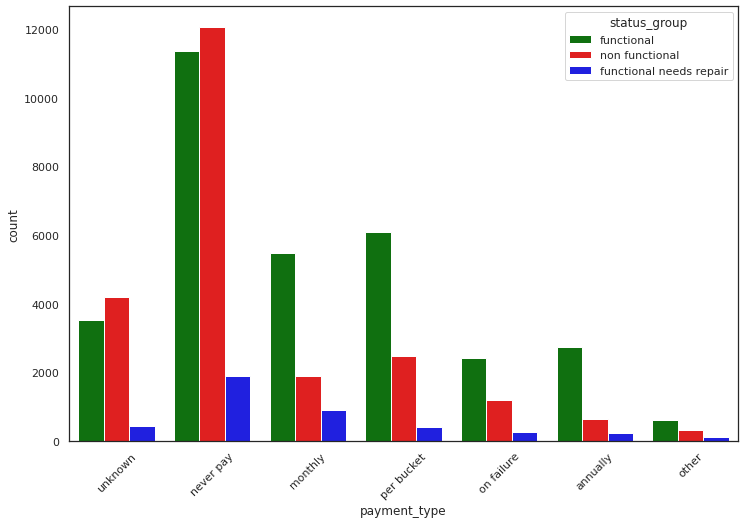

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax =plt.subplots(figsize=(12,8))
sns.countplot(x='payment_type',hue='status_group',data=df,ax=ax,palette=color_status)
plt.xticks(rotation=45)

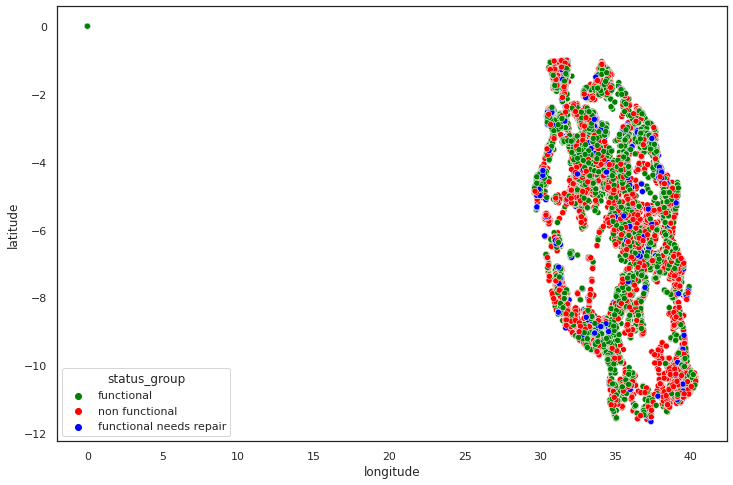

In [133]:
fig,ax =plt.subplots(figsize=(12,8))
sns.scatterplot(x='longitude',y= 'latitude',hue='status_group',data=df,ax=ax,palette=color_status)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

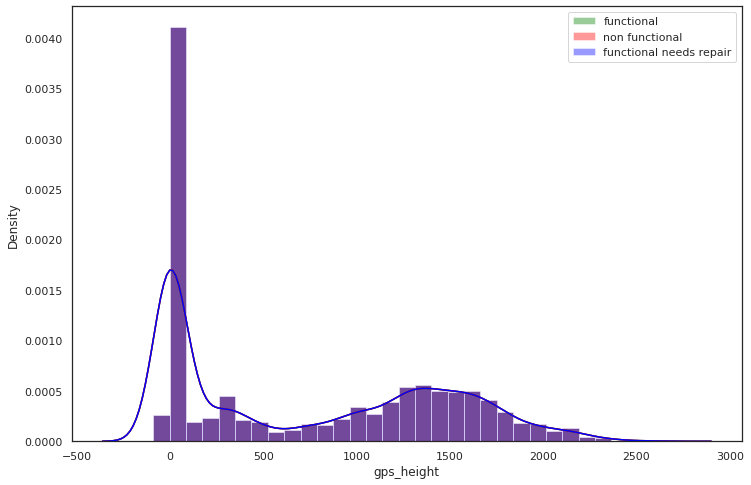

In [131]:
row_functional = (df['status_group'] == 'functional')
row_non_functional = (df['status_group'] == 'non functional')
row_repair = (df['status_group'] == 'functional needs repair')
col ='gps_height'
fig,ax =plt.subplots(figsize=(12,8))
sns.distplot(df[col][row_functional],color='green',label='functional',ax=ax)
sns.distplot(df[col][row_functional],color='red',label='non functional',ax=ax)
sns.distplot(df[col][row_functional],color='blue',label='functional needs repair',ax=ax)
plt.legend()